In [1]:
import resources
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl
mpl.use('TkAgg')
from matplotlib import cm
from matplotlib.ticker import MultipleLocator
%matplotlib inline
plt.rcParams.update({
    # "text.usetex": True,
    # "font.family": "serif",
    # "font.serif": ["Computer Modern Roman"],
    "font.size": 12,
})

2023-04-18 14:50:50.748671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 14:50:50.853920: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-18 14:50:51.346054: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/tomje/miniconda3/pkgs/cudatoolkit-11.8.0-h37601d7_11/lib/libcudart.so.11.0:/home

In [2]:
exp5 = resources.load('Test 5')
exp7 = resources.load('Test 7')
exp8 = resources.load('Test 8')
exp9 = resources.load('Test 9')
exps = [exp5, exp7, exp8, exp9] 

    
exps[0].features.drop([0, 23, 24], inplace=True)

for exp in exps:
    exp.features.loc[:,['Form error', 'Runout']] = exp.features.loc[:, ['Form error', 'Runout']]*1000

## NC4 - DCB 

In [3]:
data_names = ['mean_radius', 'peak_radius', 'runout', 'form_error']

m_rad = [exp.nc4.mean_radius for exp in exps]
p_rad = [exp.nc4.peak_radius for exp in exps]
runout = [exp.nc4.runout for exp in exps]
form_error = [exp.nc4.form_error for exp in exps]

data = [m_rad, p_rad, runout, form_error]

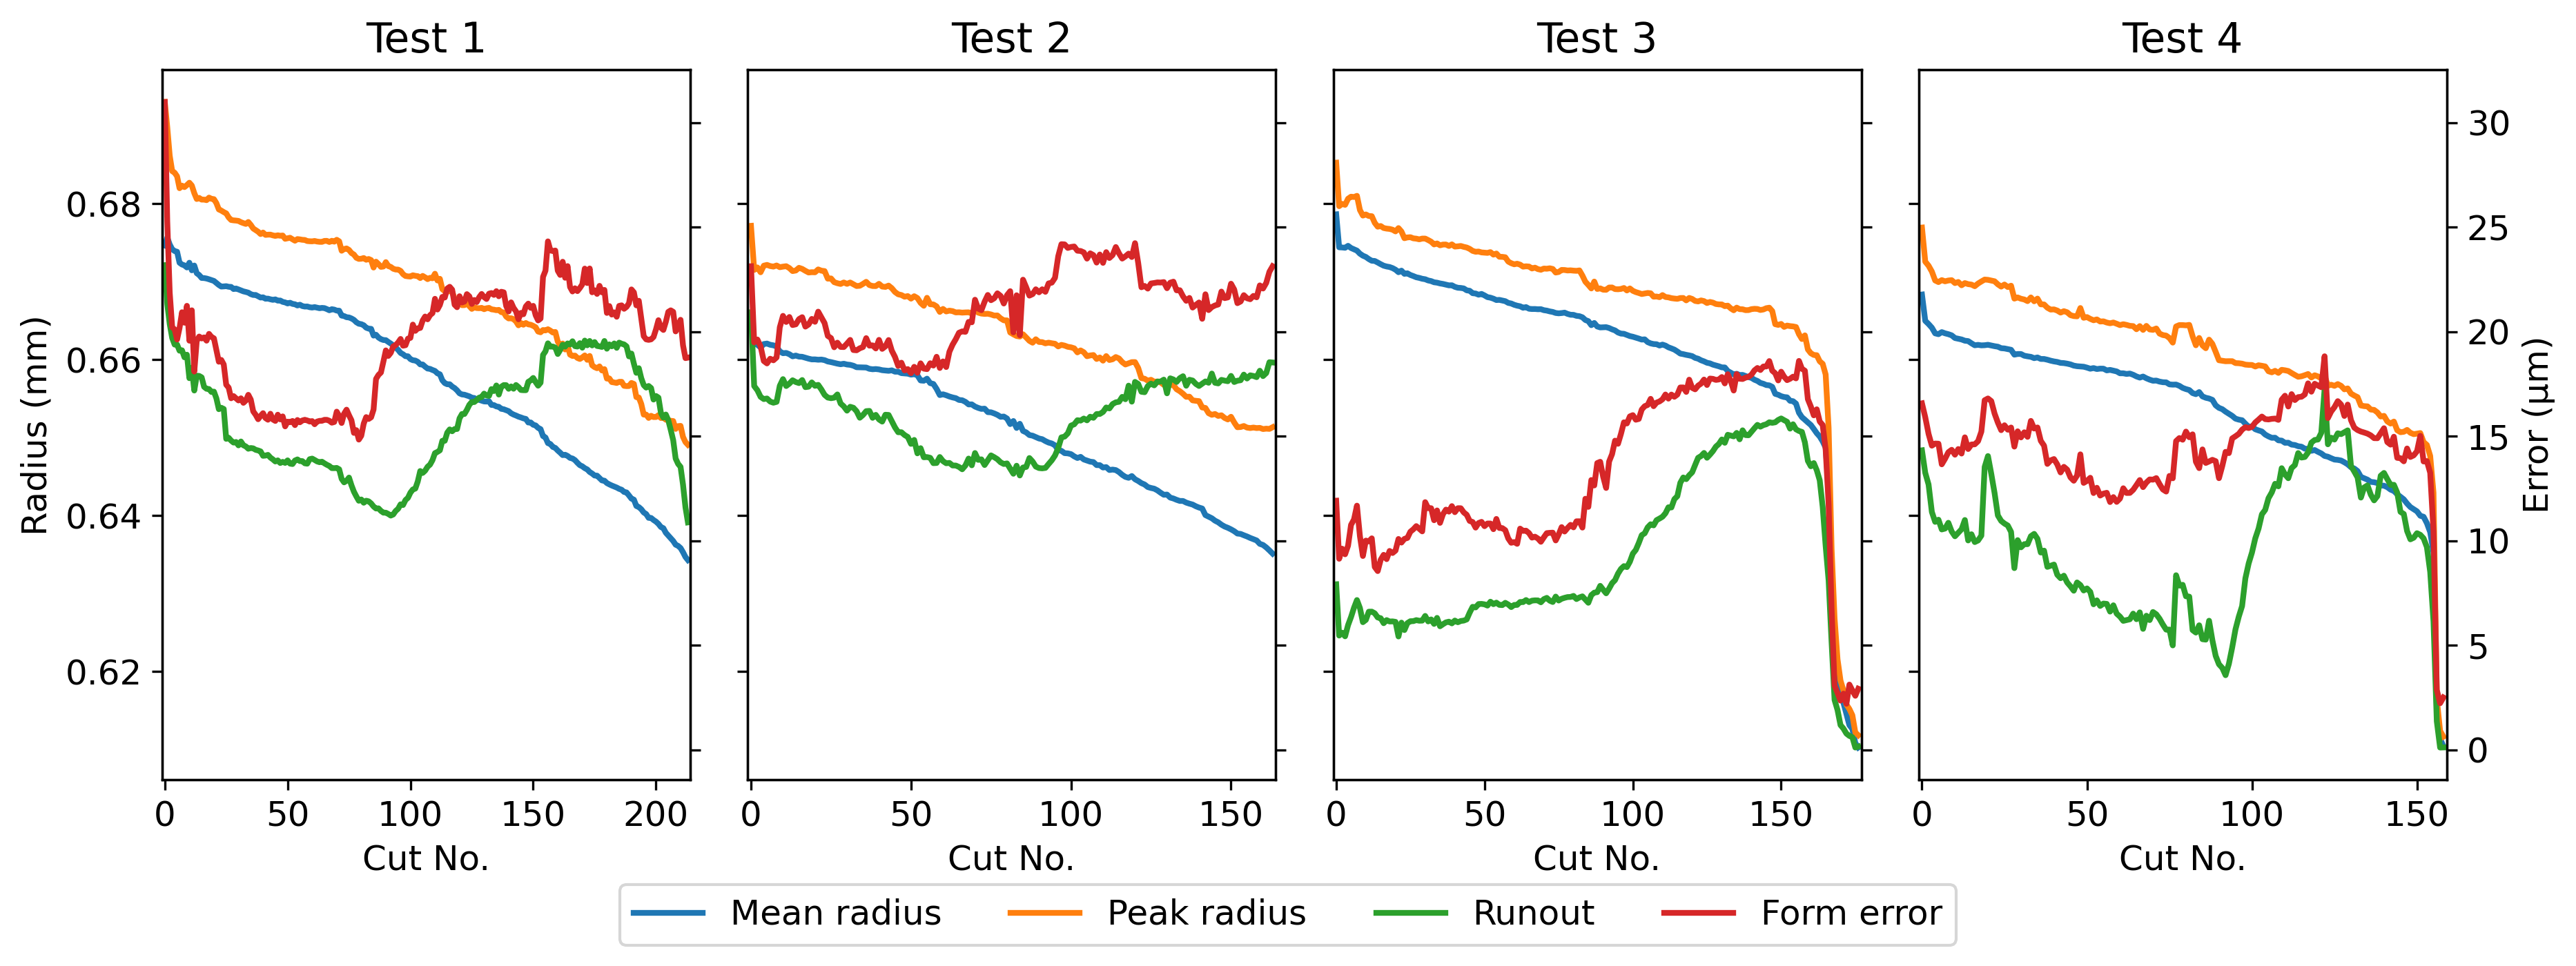

In [4]:
fig, ax = plt.subplots(1, 4, figsize=(12.6, 4.5), sharey=True, dpi=300)
axis_r = []
axis_e = []

for a in ax:
    axis_r.append(a)
    axis_e.append(a.twinx())

for ax1, ax2 in zip(axis_e[1:], axis_e[0:-1]):
    ax1.sharey(ax2)

ax = zip(axis_r, axis_e)

for i, (exp, (ax_r, ax_e)) in enumerate(zip(exps, ax)):
    # lstyle = itertools.cycle(['-', (0, (5, 1)), ':', (0, (3, 1, 1, 1,))])
    lstyle = itertools.cycle(['-'])
    lcolor = itertools.cycle(['C0', 'C1', 'C2', 'C3'])
    for data in data_names[:2]:
        lab = data.replace('_', ' ').capitalize()
        ax_r.plot(getattr(exp.nc4, data), 
                  linestyle=next(lstyle), 
                  color=next(lcolor),
                  linewidth=2, 
                  label=lab
                  )
    for data in data_names[2:]:
        lab = data.replace('_', ' ').capitalize()
        ax_e.plot(getattr(exp.nc4, data) * 1000, 
                  linestyle=next(lstyle), 
                  color=next(lcolor), 
                  linewidth=2, 
                  label=lab
                  )

    ax_r.set_title(f'Test {i+1}')
    ax_r.set_xlim(-1, len(getattr(exp.nc4, data)))
    ax_r.set_xlabel('Cut No.')
    l1, lab1 = ax_r.get_legend_handles_labels()
    l2, lab2 = ax_e.get_legend_handles_labels()

axis_r[0].set_ylabel('Radius (mm)')
axis_e[-1].set_ylabel('Error (\u03BCm)')

for a in axis_e[:-1]:
    plt.setp(a.get_yticklabels(), visible=False)

plt.figlegend(l1 + l2,
              lab1 + lab2, 
              loc='center', 
              bbox_to_anchor=(0.5, 0), 
            #   bbox_transform=fig.transfigure, 
              ncol=4
              )
fig.tight_layout()
# fig.show()

## AE - Time Domain

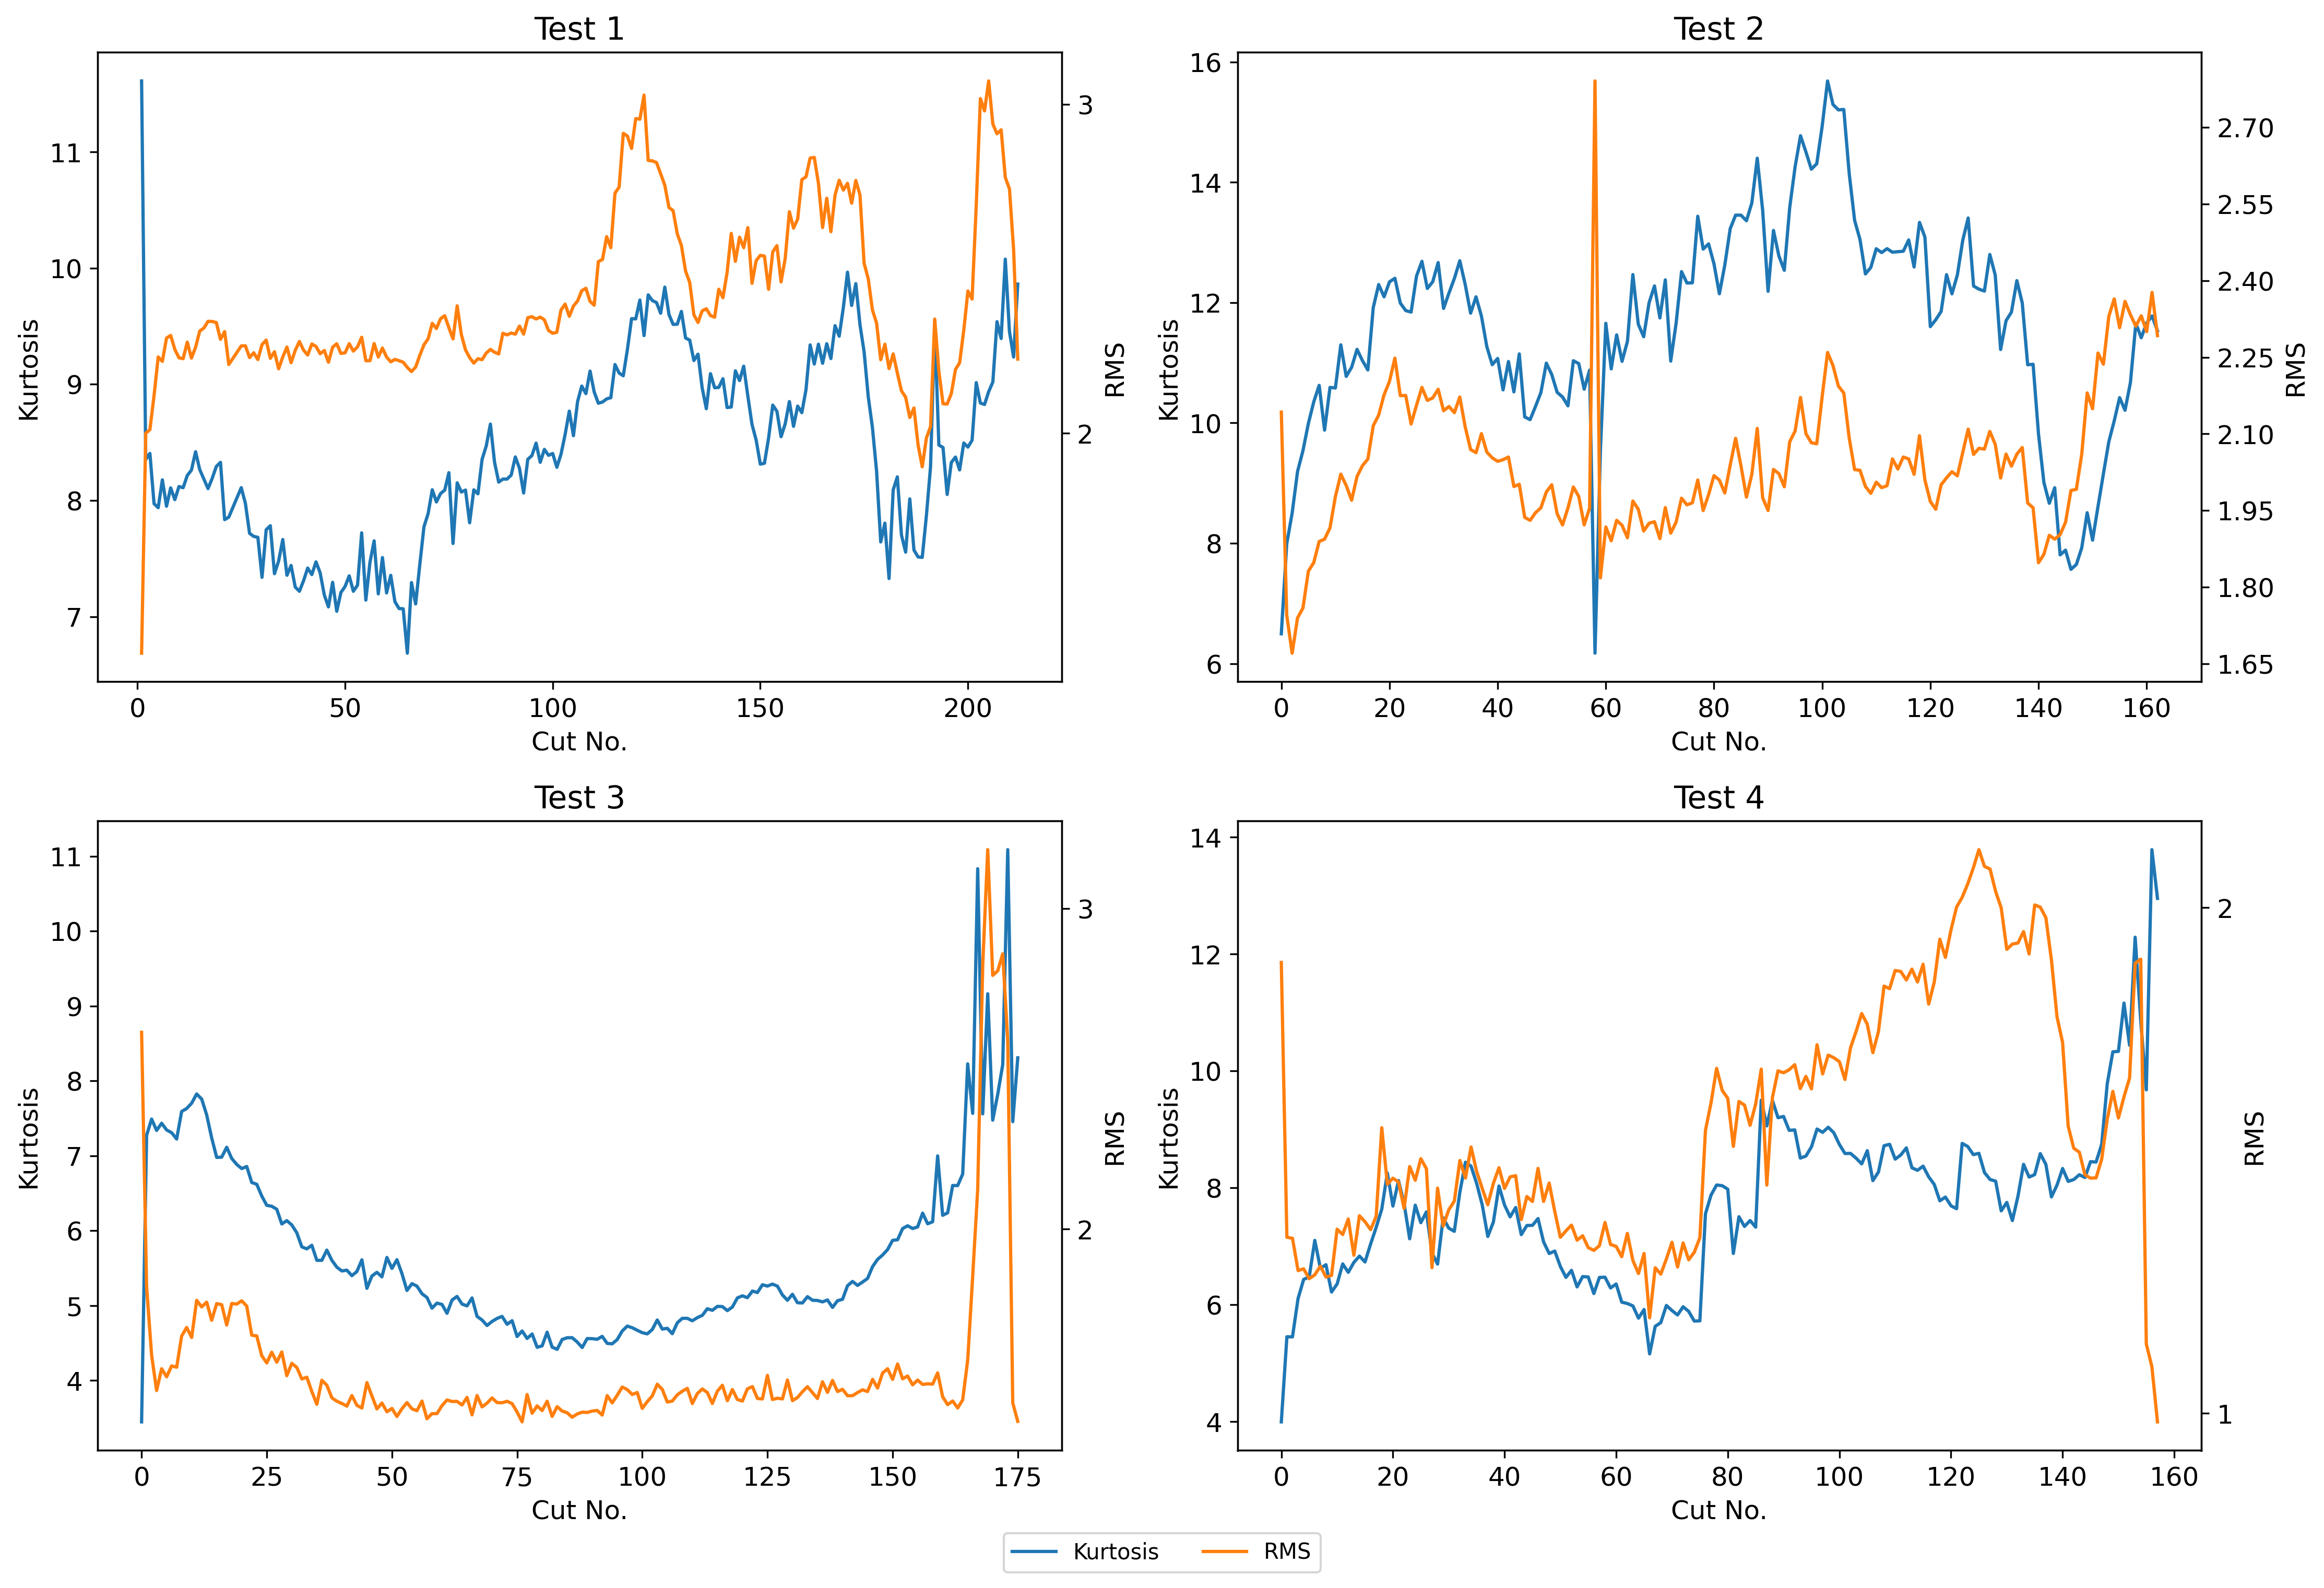

In [5]:
from matplotlib.ticker import MaxNLocator


def plot_df(df, columns, ax = None):

    cmap = cm.get_cmap('tab10', 10)
    # line_styles = ["-", "--", "-.", ":"]

    if ax is None:
        fig, ax = plt.subplots(figsize=(12.6, 4.5))
    axes = [ax]
    handles = []

    for i, _ in enumerate(range(len(columns) - 1)):
        twin = ax.twinx()
        axes.append(twin)
        twin.spines.right.set_position(("axes", 1 + i/10))

    for i, col in enumerate(columns):
        ylabel = []
        p, = axes[i].plot(df[col[0]], label = col[0], color = cmap(i)[:3])
        handles.append(p)
        ylabel.append(col[0])
 
        axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))
        axes[i].set_ylabel(', '.join(ylabel))
        axes[i].set_xlabel('Cut No.')

    return axes


fig, ax = plt.subplots(2, 2, figsize=(15, 10), dpi=300)
axes = ax.ravel()
for i, exp in enumerate(exps):
    axes[i] = plot_df(exp.features, [['Kurtosis'], ['RMS']], axes[i])
    axes[i][0].set_title(f'Test {i+1}')


l = []
lab = []

for axis in axes[-1]:
    l1, lab1 = axis.get_legend_handles_labels()
    l += l1
    lab += lab1

# for ax in axes:
#     ax[1].set_ylabel(ax[1].get_ylabel() + ' (\u03BCm)')
#     ax[2].set_ylabel(ax[2].get_ylabel() + ' (\u03BCm)')

plt.figlegend(l,
              lab, 
              loc='center', 
              bbox_to_anchor=(0.5, 0), 
              bbox_transform=fig.transFigure, 
              fontsize=10, 
              ncol=3
              )

fig.tight_layout()
# fig.show()

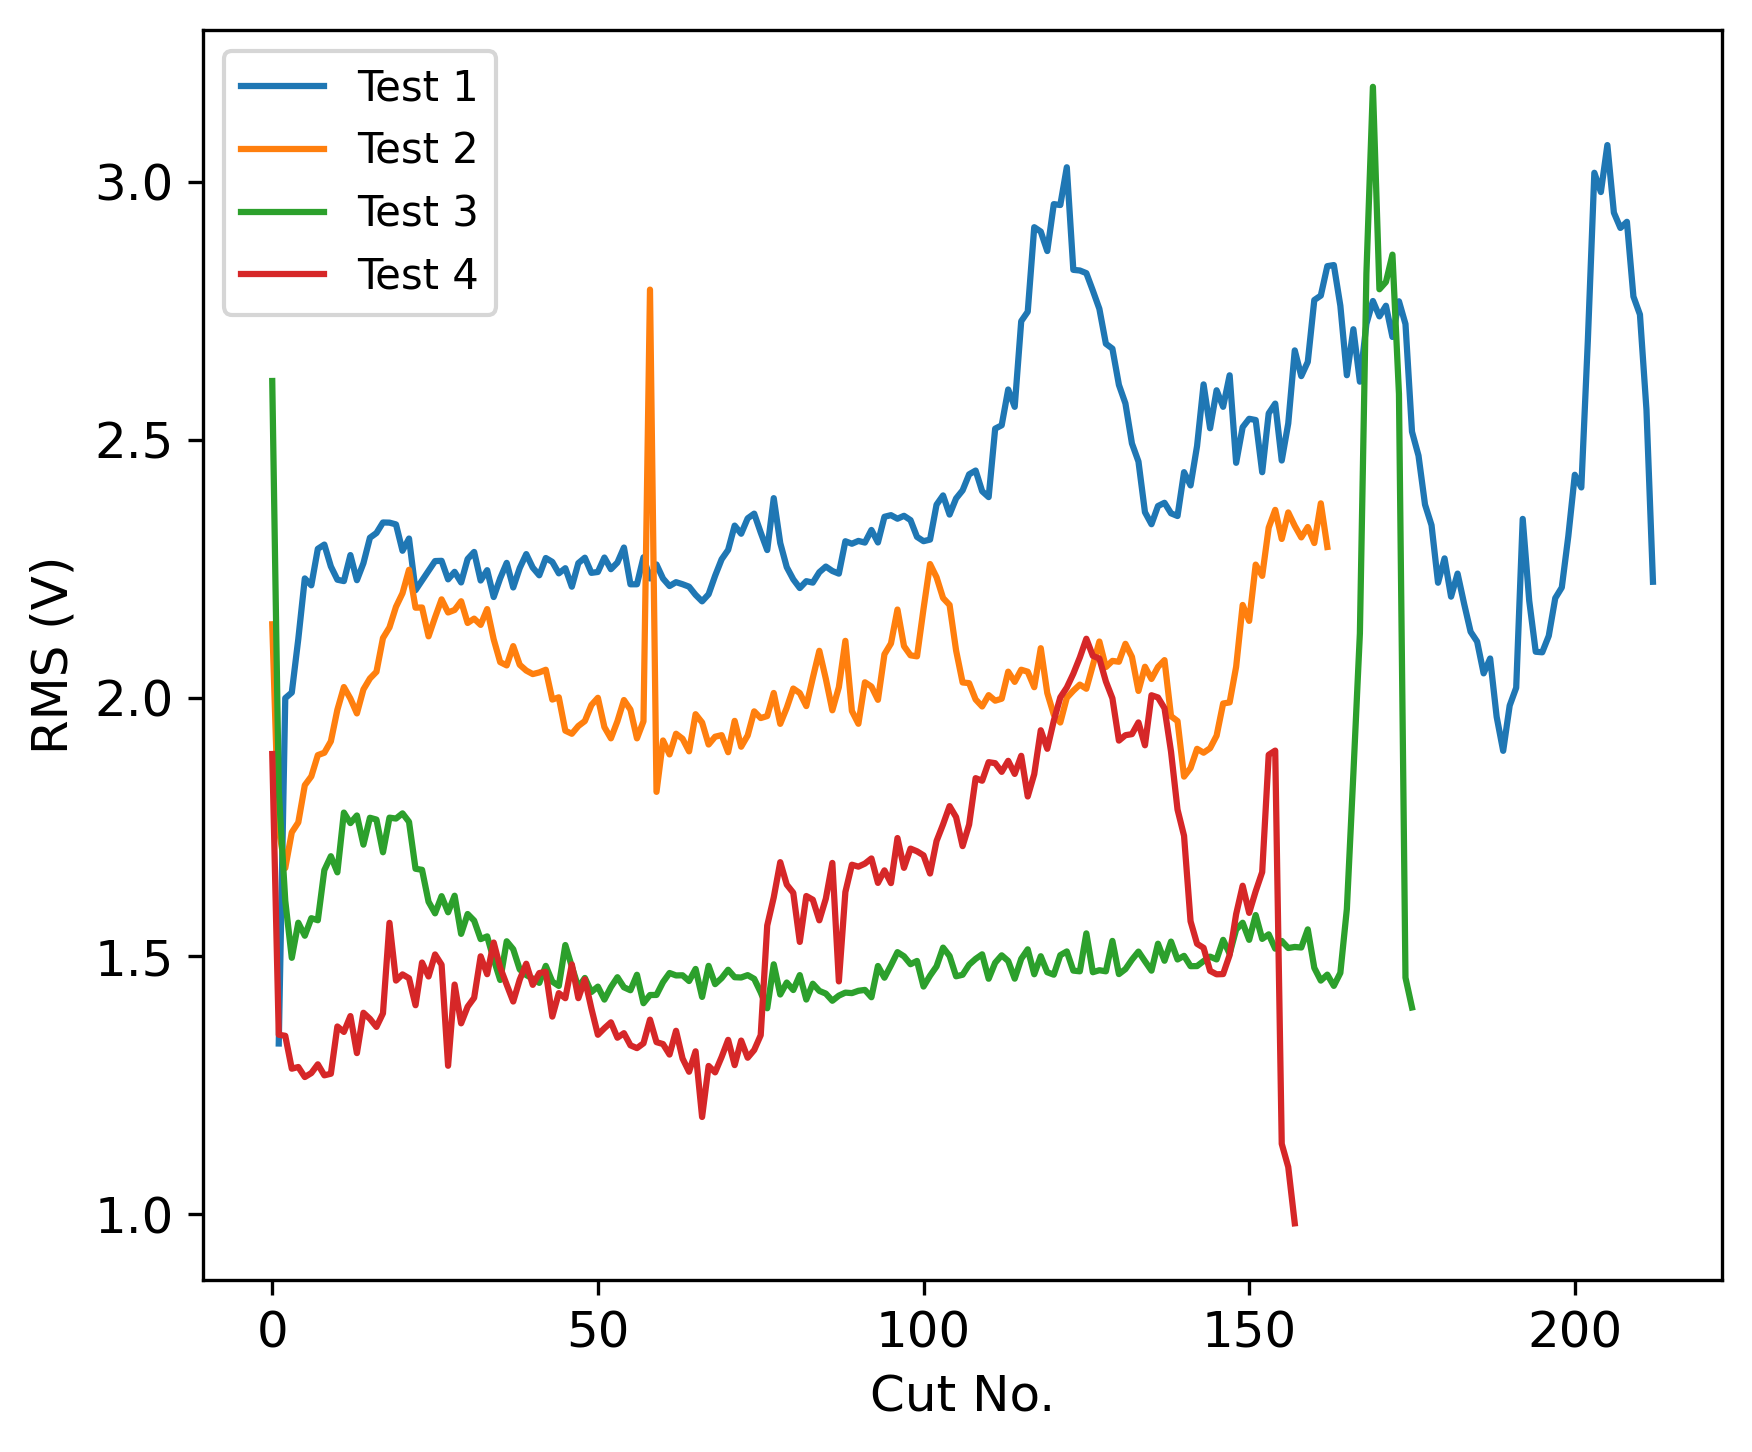

In [6]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
# lstyle = itertools.cycle(['-', (0, (5, 1)), ':', (0, (3, 1, 1, 1,))])
lstyle = itertools.cycle(['-'])
lcolor = itertools.cycle(['C0', 'C1', 'C2', 'C3'])
for i, exp in enumerate(exps):
    ax.plot(exp.features['RMS'],
            label = f'Test {i+1}',
            color=next(lcolor),
            linestyle=next(lstyle),
            )

ax.set_xlabel('Cut No.')
ax.set_ylabel('RMS (V)')
ax.legend(fontsize=10)
# plt.figlegend(loc='center left', 
#               bbox_to_anchor=(1, 0.5), 
#               ncols=1,
#               bbox_transform=fig.transFigure, 
#               )

fig.tight_layout()

In [7]:
init_df = [exp.features.iloc[0].loc[['RMS', 'Kurtosis', 'Amplitude', 'Runout', 'Form error']] for exp in exps]
init_df = pd.DataFrame(init_df)
init_df.index = [f'Test {i+1}' for i in range(len(exps))]
init_df.head()

,RMS,Kurtosis,Amplitude,Runout,Form error
Test 1,1.330936,11.609588,15.609034,20.368111,21.877093
Test 2,2.142664,6.495420,21.081037,17.403942,19.491555
Test 3,2.613773,3.444370,18.028380,5.466215,9.140574
Test 4,1.891464,3.994032,13.023259,13.251021,15.911100


## AE - Frequency Domain

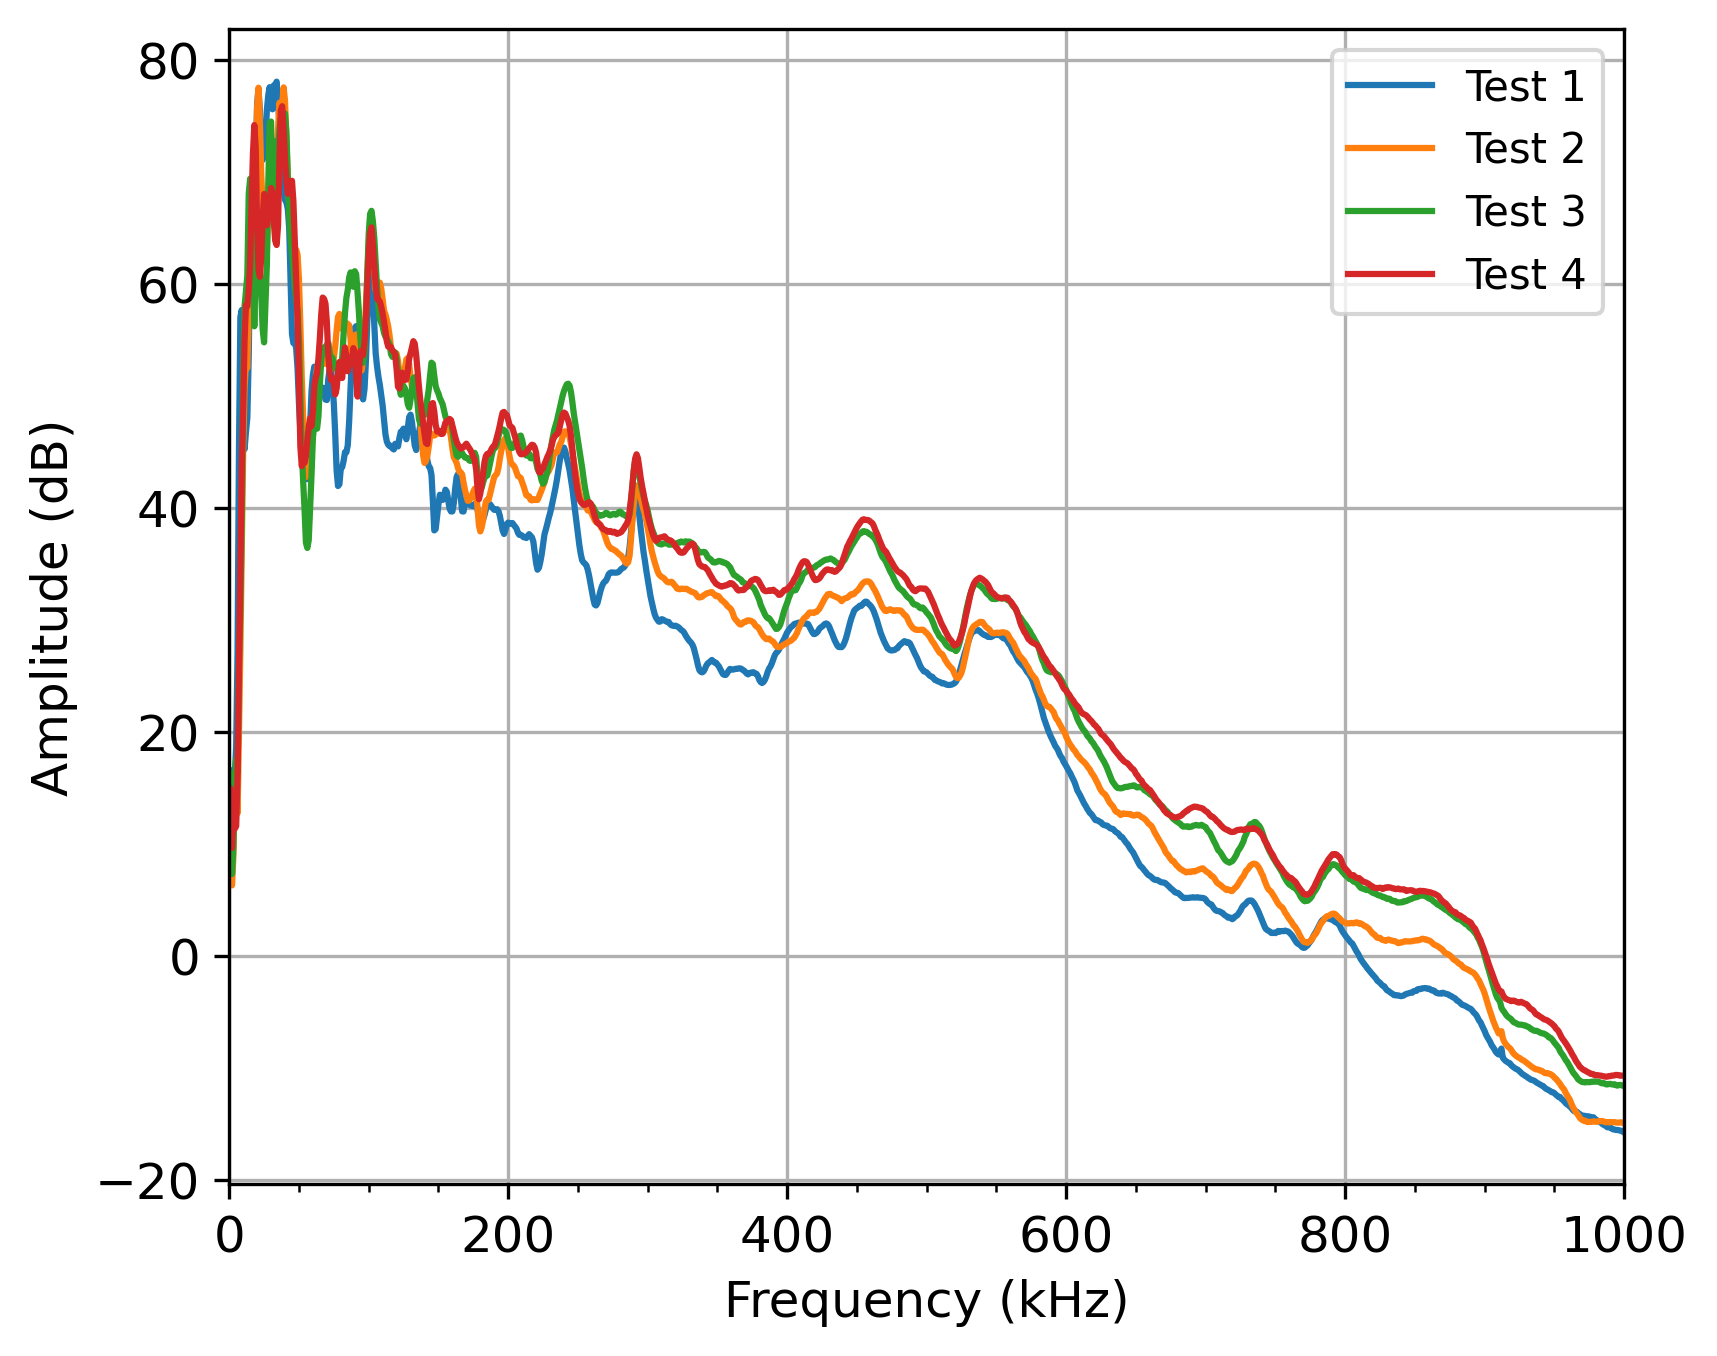

In [8]:
def fft(exp, fno, ax, freqres=1000):

    if freqres in exp.ae.fft:
        p = exp.ae.fft[freqres][fno]
    else:
        p = exp.ae._fftcalc(fno, freqres)
    f = np.arange(0, exp.ae._fs / 2, freqres, dtype=int)

    l = ax.plot(f / 1000, p)
    ax.autoscale(enable=True, axis='x', tight=True)
    ax.set_xlabel('Frequency (kHz)')
    ax.set_ylabel('Amplitude (dB)')
    return ax, l

fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
l = []
lab = []
for i, exp in enumerate(exps):
    ax, l1 = fft(exp, 40, ax)
    l += l1
    lab.append(f'Test {i+1}')
ax.legend(l, lab, fontsize=10)
ax.set_xticks(np.arange(0, 1200, 200))
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.grid(visible=True, axis='both', which='major')

In [9]:
# remove 23rd and 24th cut from test 1
exps[0].ae.fft[1000] = np.delete(exps[0].ae.fft[1000], [0, 23, 24], 0)

/tmp/ipykernel_12087/2586944807.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yt)


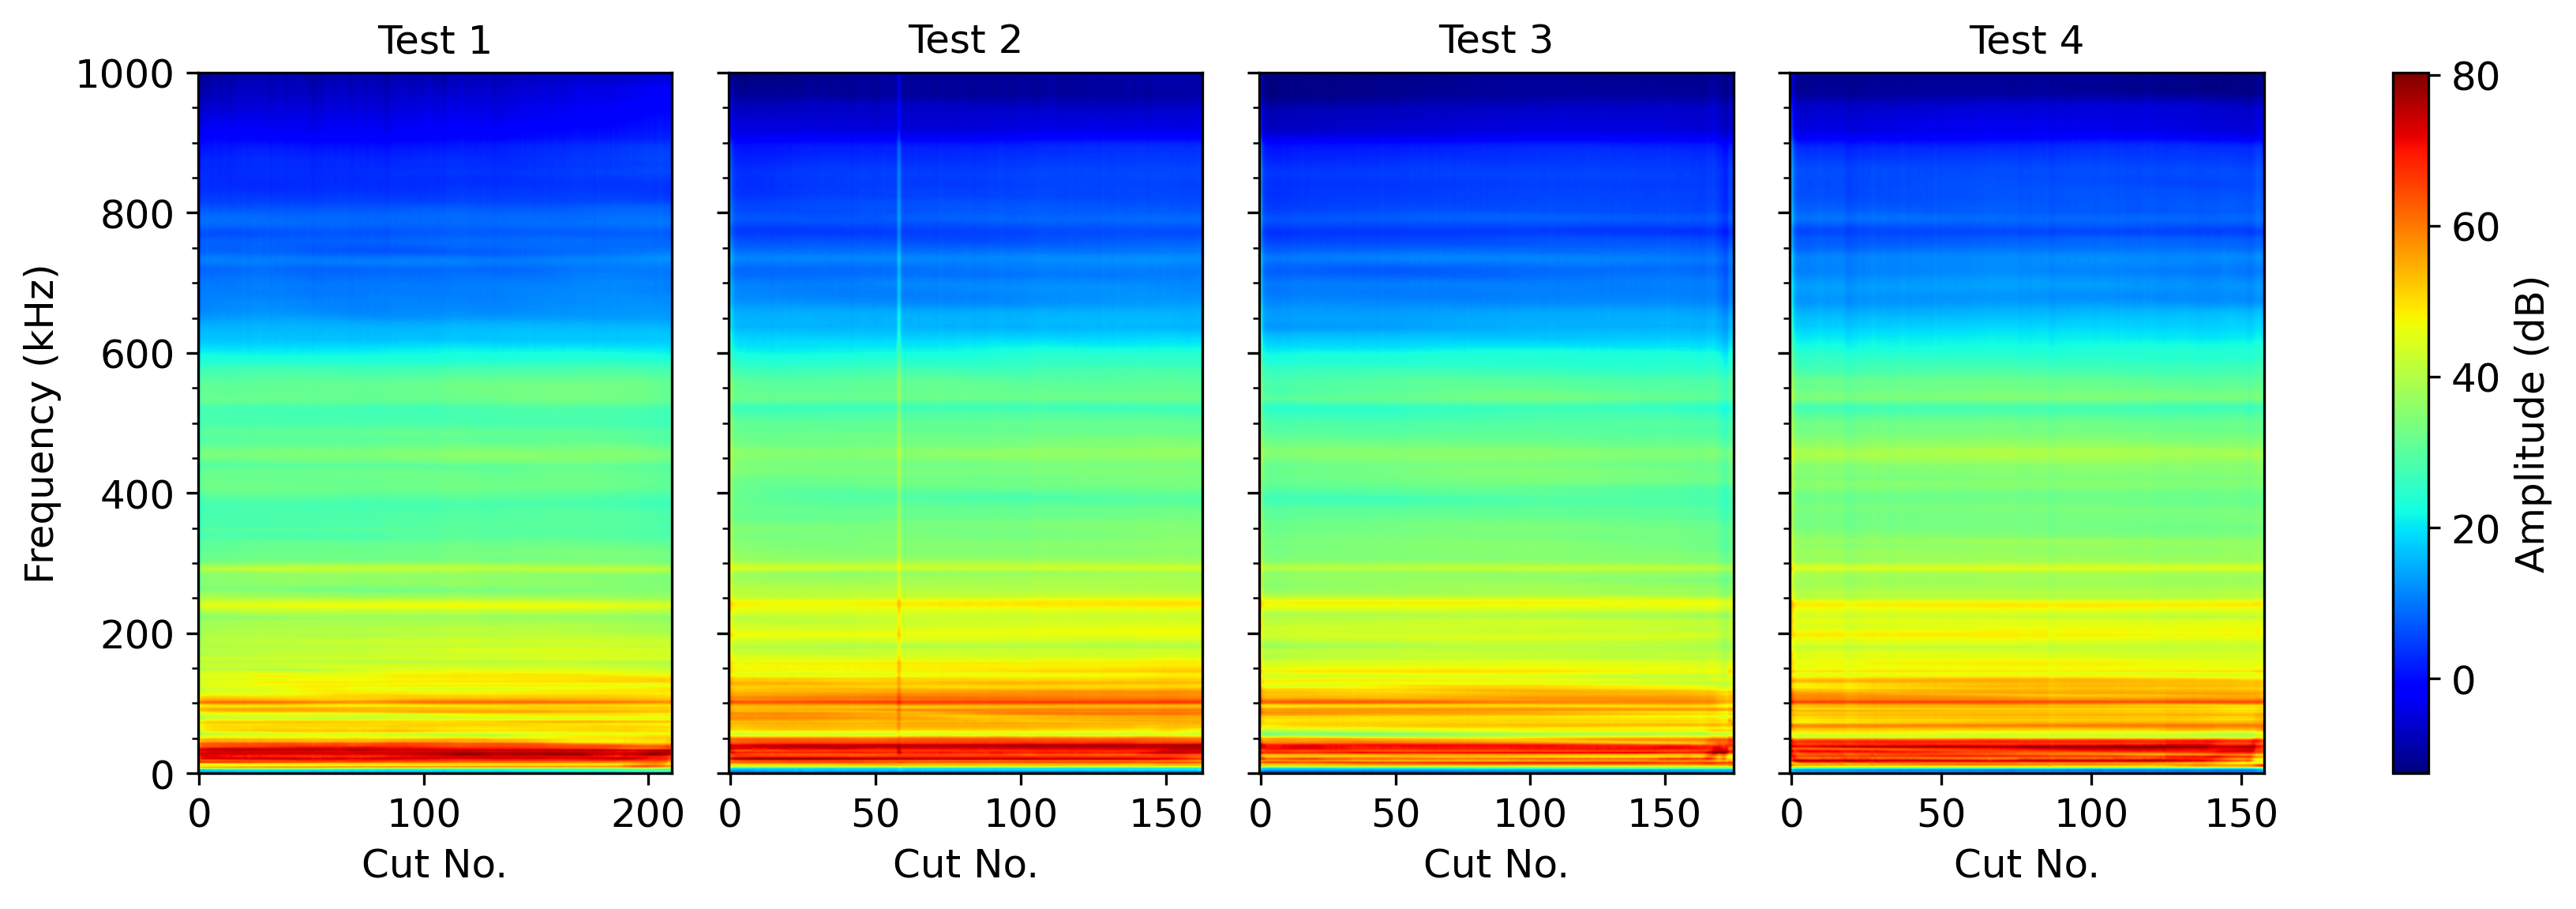

In [10]:
def surf_fft(exp, ax, freqlim=None):
        p = np.array(exp.ae.fft[1000])
        if freqlim is None:
            freqlim = {'lowlim': int(0 / 1000), 'uplim': int(exp.ae._fs / (2 * 1000))}
        else:
            freqlim = {'lowlim': int(freqlim[0] / 1000), 'uplim': int(freqlim[1] / 1000)}
        p = p[:, freqlim['lowlim']:freqlim['uplim']]

        vmin = np.min(p)
        vmax = np.max(p)

        im = ax.imshow(p.T,
                       origin='lower', 
                       interpolation='bilinear', 
                       aspect='auto', 
                       cmap='jet',
                       vmin=vmin,
                       vmax=vmax,
                       )
        # fig.colorbar(im, ax=ax, label='Amplitude (dB)') 
        ax.set_ylabel('Frequency (kHz)')
        ax.set_xlabel('Cut No.')
        ax.yaxis.set_major_locator(MaxNLocator(5, integer=True))
        ax.yaxis.set_minor_locator(MultipleLocator(50))
        yt = ax.get_yticks().tolist()
        yt = [int(y) + (freqlim['lowlim']) for y in yt]
        ax.set_yticklabels(yt)
        ax.set_ylim(0, len(p[0]))
        ax.set_title(f'Test {i+1}', fontsize=12)
        return ax, im
        
fig, ax = plt.subplots(1, 4, figsize=(12, 4), sharey=True, dpi=300)
ax = ax.ravel()

for i, exp in enumerate(exps):
    ax[i], im = surf_fft(exp, ax[i])
    if i > 0:
         ax[i].set(ylabel=None)
fig.subplots_adjust(right=0.8)
fig.tight_layout()
cbar = fig.colorbar(im, ax=ax.ravel().tolist(), label='Amplitude (dB)')

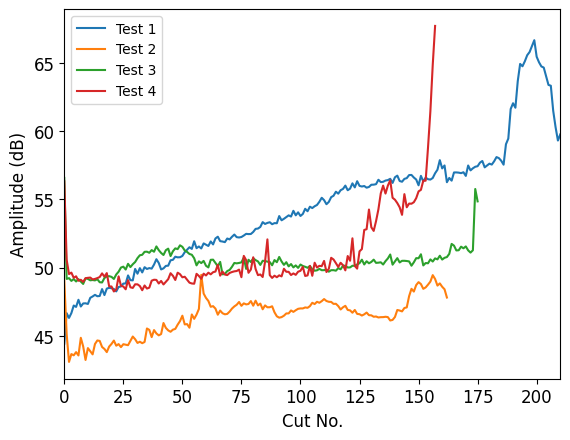

In [41]:
fig, ax = plt.subplots()
for i, exp in enumerate(exps):
    f = np.array(exp.ae.fft[1000]).T
    # f_30_40  = np.mean(f[10:11], axis=0)
    ax.plot(f[10], label=f'Test {i+1}')

ax.set_xlabel('Cut No.')
ax.set_ylabel('Amplitude (dB)')
ax.legend(fontsize=10)
# ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.autoscale(enable=True, axis='x', tight=True)